In [1]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [3]:
from scipy import stats #the only import you actually need for this
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [4]:
# function that tests distribution then picks test accordingly
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

## import data

In [5]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl').reset_index()
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
data.head()

,Publication Year,"Times Cited, All Databases",Author Full Names,Addresses,first_author,United States,Algeria,Argentina,Armenia,Australia,...,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china
wos_ID,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,106.0,"modrich, p; richardson, cc","harvard univ, med sch, dept biol chem, boston,...","modrich, p",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,28.0,"esche, h; schweiger, m; trautner, ta","max planck inst molek genet,abt trautner,ihne ...","esche, h",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,50.0,"jazwinski, sm; lindberg, aa; kornberg, a","stanford univ, sch med, dept biochem, stanford...","jazwinski, sm",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,31.0,"silberstein, s; inouye, m; studier, fw","suny, dept biochem, stony brook, ny 11794 usa;...","silberstein, s",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,3.0,"levy, jn","univ washington, dept genet, seattle, wa 98105...","levy, jn",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the number of papers
num_papers = data.shape[0]
print(f"Number of Papers: {num_papers}")


Number of Papers: 57217


# Publications trends

In [7]:
# First, replace NaN values with 'not_global_south' and non-NaN values with 'global_south'
data['global_south2'] = data['global_south'].apply(lambda x: 'first_author_global_south' if pd.notna(x) else 'first_author_not_global_south')

# Then, get the counts of 'Publication Year' grouped by 'global_south' and the year
data_trend = data.groupby('global_south2')['Publication Year'].value_counts().unstack(level=0)

# Finally, sort by the index (which is the 'Publication Year')
data_trend = data_trend.sort_index()
data_trend

global_south2,first_author_global_south,first_author_not_global_south
Publication Year,,
1975,NaN,571.0
1976,NaN,587.0
1977,NaN,492.0
1978,NaN,299.0
1979,NaN,274.0
1980,NaN,288.0
1981,NaN,255.0
1982,NaN,250.0
1983,NaN,237.0


In [8]:
# Calculate the inverse cumulative proportion
data_trend['Ratio'] = data_trend['first_author_global_south'] / data_trend['first_author_not_global_south']

data_trend

global_south2,first_author_global_south,first_author_not_global_south,Ratio
Publication Year,,,
1975,NaN,571.0,NaN
1976,NaN,587.0,NaN
1977,NaN,492.0,NaN
1978,NaN,299.0,NaN
1979,NaN,274.0,NaN
1980,NaN,288.0,NaN
1981,NaN,255.0,NaN
1982,NaN,250.0,NaN
1983,NaN,237.0,NaN


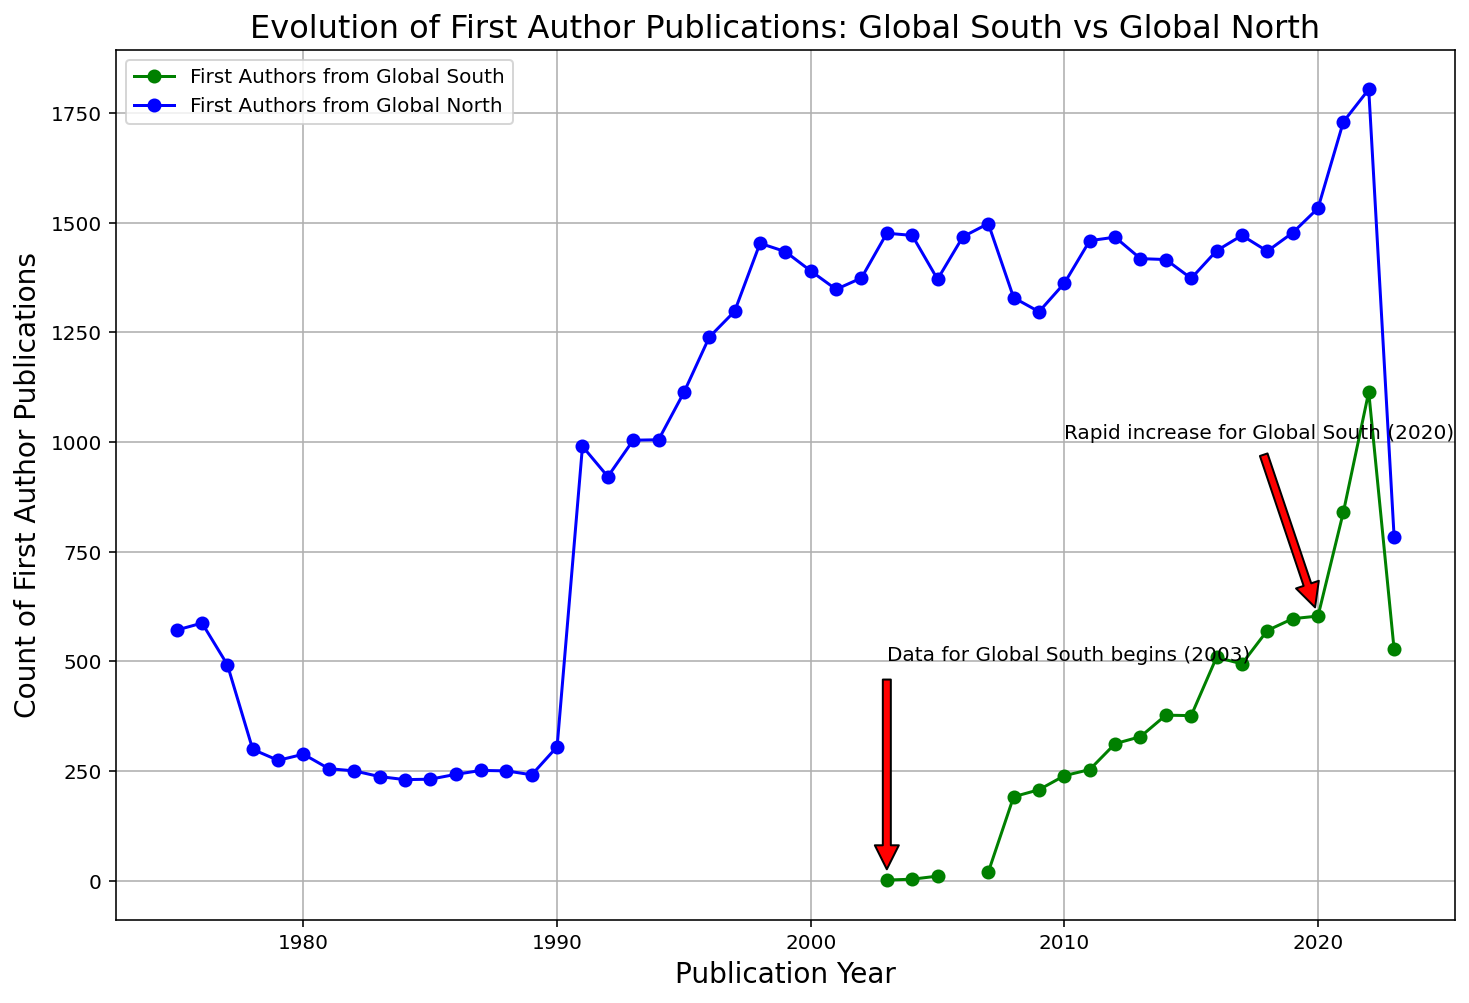

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df = data_trend 

plt.figure(figsize=(12, 8))

# Plotting the lines
plt.plot(df.index, df['first_author_global_south'], label='First Authors from Global South', marker='o', color='green')
plt.plot(df.index, df['first_author_not_global_south'], label='First Authors from Global North', marker='o', color='blue')

# Adding labels, title and legend
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Count of First Author Publications', fontsize=14)
plt.title('Evolution of First Author Publications: Global South vs Global North', fontsize=16)
plt.legend()

# Emphasize the starting point of data for Global South
plt.annotate('Data for Global South begins (2003)', 
             xy=(2003, df.loc[2003, 'first_author_global_south']), 
             xytext=(2003, df.loc[2003, 'first_author_global_south'] + 500), 
             arrowprops=dict(facecolor='red', shrink=0.05))

# Highlight the recent increase for Global South
plt.annotate('Rapid increase for Global South (2020)', 
             xy=(2020, df.loc[2020, 'first_author_global_south']), 
             xytext=(2010, df.loc[2016, 'first_author_global_south'] + 500), 
             arrowprops=dict(facecolor='red', shrink=0.05))

# Grid for easier visualization
plt.grid(True)

# Save the plot at 300 dpi
#plt.tight_layout()
plt.savefig('D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/figure/first_authors_publication_year_plot.png', dpi=300)

plt.show()


# countries, region and income

## import data

In [10]:
#Import data
country_data_citation = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl').reset_index()
country_data_citation = country_data_citation.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
country_data_citation.head()

,,"Times Cited, All Databases",Author Full Names,Addresses,first_author,United States,Algeria,Argentina,Armenia,Australia,Austria,...,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,106.0,"modrich, p; richardson, cc","harvard univ, med sch, dept biol chem, boston,...","modrich, p",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,28.0,"esche, h; schweiger, m; trautner, ta","max planck inst molek genet,abt trautner,ihne ...","esche, h",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,50.0,"jazwinski, sm; lindberg, aa; kornberg, a","stanford univ, sch med, dept biochem, stanford...","jazwinski, sm",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,31.0,"silberstein, s; inouye, m; studier, fw","suny, dept biochem, stony brook, ny 11794 usa;...","silberstein, s",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,3.0,"levy, jn","univ washington, dept genet, seattle, wa 98105...","levy, jn",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in country_data_citation.columns[:-1]:  
    publication_counts[column] = country_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = country_data_citation[country_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['Country', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['Country', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['Country', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='Country', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='Country', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('Country')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_authors_countries_count_citation_list.csv')

final_merged_df.head(60)

,Country,Publication Count,Total Citation,Average Citation Count,%
0,"Times Cited, All Databases",53971,2333188.0,43.230402,94.326861
1,Author Full Names,57217,2333188.0,43.230402,100.000000
2,Addresses,57217,2333188.0,43.230402,100.000000
3,first_author,57217,2333188.0,43.230402,100.000000
4,United States,8460,306631.0,39.006615,14.785815
5,Algeria,2,9.0,4.500000,0.003495
6,Argentina,140,2111.0,16.622047,0.244683
7,Armenia,8,43.0,5.375000,0.013982
8,Australia,620,14217.0,24.344178,1.083594
9,Austria,136,4998.0,38.744186,0.237692


In [12]:
# Reset the index to make 'Publication Year' a regular column
country_data2 = country_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
country_data2['Year Group'] = pd.cut(country_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
country_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(country_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='Country', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'Country']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'Country', 'Publication Count',	'Total Citation']


grouped

,Year Group,Country,Publication Count,Total Citation
0,"(1973, 1978]",Algeria,0,0.0
1,"(1973, 1978]",Argentina,0,0.0
2,"(1973, 1978]",Armenia,0,0.0
3,"(1973, 1978]",Australia,0,0.0
4,"(1973, 1978]",Austria,0,0.0
...,...,...,...,...
1515,"(2018, 2023]",wb_middle_east_and_north_africa,504,3837.0
1516,"(2018, 2023]",wb_north_america,2966,34191.0
1517,"(2018, 2023]",wb_south_asia,442,2372.0
1518,"(2018, 2023]",wb_sub_saharan_africa,102,683.0


In [13]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='Country', columns='Year Group', values=['Publication Count', 'Total Citation'])

# Fill O values with NaN
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_authors_countries_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_authors_countries_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                            (1973, 1978] (1978, 1983] (1983, 1988]   
Country                                                                        
Algeria                                        NaN          NaN          NaN   
Argentina                                      NaN          NaN          NaN   
Armenia                                        NaN          NaN          NaN   
Australia                                      NaN          NaN          NaN   
Austria                                        NaN          NaN          NaN   
...                                            ...          ...          ...   
wb_middle_east_and_north_africa                NaN          NaN          NaN   
wb_north_america                               1.0          NaN          1.0   
wb_south_asia                                  NaN          NaN          NaN   
wb_sub_saharan_africa                          NaN          NaN          NaN   
wb_upper_middle_income_economies               NaN          NaN          NaN   

                                                                         \
Year Group                       (1988, 1993] (1993, 1998] (1998, 2003]   
Country                                                                   
Algeria                                   NaN          NaN          NaN   
Argentina                                 NaN          NaN          NaN   
Armenia                                   NaN          NaN          NaN   
Australia                                 NaN          NaN          NaN   
Austria                                   NaN          NaN          1.0   
...                                       ...          ...          ...   
wb_middle_east_and_north_africa           NaN          NaN          NaN   
wb_north_america                          7.0          1.0          7.0   
wb_south_asia                             NaN          NaN          NaN   
wb_sub_saharan_africa                     NaN          NaN          NaN   
wb_upper_middle_income_economies          NaN          NaN          1.0   

                                                                         \
Year Group                       (2003, 2008] (2008, 2013] (2013, 2018]   
Country                                                                   
Algeria                                   NaN          1.0          NaN   
Argentina                                 9.0         40.0         47.0   
Armenia                                   NaN          1.0          2.0   
Australia                                34.0        154.0        200.0   
Austria                                  10.0         37.0         48.0   
...                                       ...          ...          ...   
wb_middle_east_and_north_africa          40.0        191.0        379.0   
wb_north_america                        605.0       2900.0       2961.0   
wb_south_asia                            41.0        227.0        324.0   
wb_sub_saharan_africa                     3.0         30.0         69.0   
wb_upper_middle_income_economies        194.0       1149.0       1930.0   

                                              Total Citation               \
Year Group                       (2018, 2023]   (1973, 1978] (1978, 1983]   
Country                                                                     
Algeria                                   1.0            NaN          NaN   
Argentina                                44.0            NaN          NaN   
Armenia                                   5.0            NaN          NaN   
Australia                               232.0            NaN          NaN   
Austria                                  40.0            NaN          NaN   
...                                       ...            ...          ...   
wb_middle_east_and_north_africa         504.0            NaN          NaN   
wb_north_america                       2

# region

## UN REGION GROUP

In [14]:
un_region_group = ['Times Cited, All Databases','Addresses','un_north_africa','un_eastern_africa','un_middle_africa','un_Southern_africa','un_Western_africa',
    'un_Latin_America_and_the_Caribbean','un_Northern_America',
    'un_Central_Asia','un_Eastern_Asia','un_South_eastern_Asia','un_Southern_Asia','un_Western_Asia',
    'un_Eastern_Europe','un_Northern_Europe','un_Southern_Europe','un_Western_Europe',
    'un_Australia_and_New_Zealand','un_Melanesia','un_Micronesia','un_Polynesia']

In [15]:
#Import data
un_region_group_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
un_region_group = [region for region in un_region_group if region in un_region_group_data.columns]#

# Select columns and reset index
un_region_group_data = un_region_group_data[un_region_group].reset_index()

# Rename columns and set index
un_region_group_data_citation = un_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
un_region_group_data_citation.head()

,,"Times Cited, All Databases",Addresses,un_north_africa,un_eastern_africa,un_middle_africa,un_Southern_africa,un_Western_africa,un_Latin_America_and_the_Caribbean,un_Northern_America,un_Central_Asia,un_Eastern_Asia,un_South_eastern_Asia,un_Southern_Asia,un_Western_Asia,un_Eastern_Europe,un_Northern_Europe,un_Southern_Europe,un_Western_Europe,un_Australia_and_New_Zealand
wos_ID,Publication Year,,,,,,,,,,,,,,,,,,,
wos:a1975ak27200035,1975,106.0,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,28.0,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,50.0,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,31.0,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,3.0,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in un_region_group_data_citation.columns[:-1]:  
    publication_counts[column] = un_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = un_region_group_data_citation[un_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['un_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['un_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['un_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='un_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='un_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('un_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_un_region_count_citation_list.csv')

final_merged_df.head(60)

,un_region,Publication Count,Total Citation,Average Citation Count,%
0,"Times Cited, All Databases",53971,2333188.0,43.230402,94.326861
1,Addresses,57217,2333188.0,43.230402,100.000000
2,un_north_africa,243,3377.0,16.717822,0.424699
3,un_eastern_africa,44,508.0,12.390244,0.076900
4,un_middle_africa,7,69.0,11.500000,0.012234
5,un_Southern_africa,120,1535.0,14.212963,0.209728
6,un_Western_africa,41,475.0,14.843750,0.071657
7,un_Latin_America_and_the_Caribbean,39,469.0,13.027778,0.068162
8,un_Northern_America,9449,340950.0,38.845847,16.514323
9,un_Central_Asia,10,9.0,1.500000,0.017477


In [17]:
# Reset the index to make 'Publication Year' a regular column
un_region_group_data2 = un_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
un_region_group_data2['Year Group'] = pd.cut(un_region_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
un_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(un_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='un_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'un_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'un_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,un_region,Publication Count,Total Citation
0,"(1973, 1978]",un_Australia_and_New_Zealand,0,0.0
1,"(1973, 1978]",un_Central_Asia,0,0.0
2,"(1973, 1978]",un_Eastern_Asia,0,0.0
3,"(1973, 1978]",un_Eastern_Europe,0,0.0
4,"(1973, 1978]",un_Latin_America_and_the_Caribbean,0,0.0
...,...,...,...,...
165,"(2018, 2023]",un_Western_Europe,1128,11951.0
166,"(2018, 2023]",un_Western_africa,21,76.0
167,"(2018, 2023]",un_eastern_africa,28,251.0
168,"(2018, 2023]",un_middle_africa,5,29.0


In [18]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='un_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_un_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_un_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              (1973, 1978] (1978, 1983]   
un_region                                                           
un_Australia_and_New_Zealand                     NaN          NaN   
un_Central_Asia                                  NaN          NaN   
un_Eastern_Asia                                  NaN          NaN   
un_Eastern_Europe                                NaN          NaN   
un_Latin_America_and_the_Caribbean               NaN          NaN   
un_Northern_America                              1.0          NaN   
un_Northern_Europe                               4.0          1.0   
un_South_eastern_Asia                            NaN          NaN   
un_Southern_Asia                                 NaN          NaN   
un_Southern_Europe                               NaN          NaN   
un_Southern_africa                               NaN          NaN   
un_Western_Asia                                  NaN          NaN   
un_Western_Europe                                NaN          NaN   
un_Western_africa                                NaN          NaN   
un_eastern_africa                                NaN          NaN   
un_middle_africa                                 NaN          NaN   
un_north_africa                                  NaN          NaN   

                                                                           \
Year Group                         (1983, 1988] (1988, 1993] (1993, 1998]   
un_region                                                                   
un_Australia_and_New_Zealand                NaN          1.0          NaN   
un_Central_Asia                             NaN          NaN          NaN   
un_Eastern_Asia                             NaN          NaN          NaN   
un_Eastern_Europe                           NaN          NaN          NaN   
un_Latin_America_and_the_Caribbean          NaN          NaN          NaN   
un_Northern_America                         1.0          7.0          1.0   
un_Northern_Europe                          NaN          1.0          1.0   
un_South_eastern_Asia                       NaN          NaN          NaN   
un_Southern_Asia                            NaN          NaN          NaN   
un_Southern_Europe                          NaN          NaN          NaN   
un_Southern_africa                          NaN          NaN          NaN   
un_Western_Asia                             NaN          NaN          NaN   
un_Western_Europe                           NaN          NaN          NaN   
un_Western_africa                           NaN          NaN          NaN   
un_eastern_africa                           NaN          NaN          NaN   
un_middle_africa                            NaN          NaN          NaN   
un_north_africa                             NaN          NaN          NaN   

                                                                           \
Year Group                         (1998, 2003] (2003, 2008] (2008, 2013]   
un_region                                                                   
un_Australia_and_New_Zealand                NaN         41.0        195.0   
un_Central_Asia                             NaN          NaN          NaN   
un_Eastern_Asia                             2.0        242.0       1389.0   
un_Eastern_Europe                           NaN         60.0        292.0   
un_Latin_America_and_the_Caribbean          NaN          4.0         15.0   
un_Northern_America                         7.0        605.0       2900.0   
un_Northern_Europe                          2.0        176.0        925.0   
un_South_eastern_Asia                       NaN         15.0        103.0   
un_Southern_Asia                            NaN         47.0        281.0   
un_Southern_Europe                          NaN         96.0        475.0   
un_Southern_africa                          NaN          2.0         17.0   
un_Western_Asia                    

## WB REGION GROUP

In [19]:
wb_region_group = ['Times Cited, All Databases','Addresses','wb_east_asia_and_pacific', 'wb_europe_and_central_asia', 'wb_latin_america_and_the_caribbean',
                   'wb_middle_east_and_north_africa', 'wb_north_america', 'wb_south_asia', 'wb_sub_saharan_africa']

In [20]:
#Import data
wb_region_group_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
wb_region_group = [region for region in wb_region_group if region in wb_region_group_data.columns]#

# Select columns and reset index
wb_region_group_data = wb_region_group_data[wb_region_group].reset_index()

# Rename columns and set index
wb_region_group_data_citation = wb_region_group_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
wb_region_group_data_citation.head()

,,"Times Cited, All Databases",Addresses,wb_east_asia_and_pacific,wb_europe_and_central_asia,wb_latin_america_and_the_caribbean,wb_middle_east_and_north_africa,wb_north_america,wb_south_asia,wb_sub_saharan_africa
wos_ID,Publication Year,,,,,,,,,
wos:a1975ak27200035,1975,106.0,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,28.0,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,50.0,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,31.0,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,3.0,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in wb_region_group_data_citation.columns[:-1]:  
    publication_counts[column] = wb_region_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = wb_region_group_data_citation[wb_region_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['wb_region', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['wb_region', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['wb_region', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='wb_region', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='wb_region', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('wb_region')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_wb_region_count_citation_list.csv')

final_merged_df.head(60)

,wb_region,Publication Count,Total Citation,Average Citation Count,%
0,"Times Cited, All Databases",53971,2333188.0,43.230402,94.326861
1,Addresses,57217,2333188.0,43.230402,100.000000
2,wb_east_asia_and_pacific,7853,133481.0,19.236345,13.724942
3,wb_europe_and_central_asia,9782,263530.0,29.087196,17.096318
4,wb_latin_america_and_the_caribbean,1041,15288.0,16.403433,1.819389
5,wb_middle_east_and_north_africa,1114,20408.0,21.039175,1.946974
6,wb_north_america,9449,340950.0,38.845847,16.514323
7,wb_south_asia,1034,14375.0,16.618497,1.807155


In [22]:
# Reset the index to make 'Publication Year' a regular column
wb_region_group_data2 = wb_region_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
wb_region_group_data2['Year Group'] = pd.cut(wb_region_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
wb_region_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(wb_region_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='wb_region', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'wb_region']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'wb_region', 'Publication Count',	'Total Citation']


grouped

,Year Group,wb_region,Publication Count,Total Citation
0,"(1973, 1978]",wb_east_asia_and_pacific,0,0.0
1,"(1973, 1978]",wb_europe_and_central_asia,4,12.0
2,"(1973, 1978]",wb_latin_america_and_the_caribbean,0,0.0
3,"(1973, 1978]",wb_middle_east_and_north_africa,0,0.0
4,"(1973, 1978]",wb_north_america,1,0.0
...,...,...,...,...
65,"(2018, 2023]",wb_latin_america_and_the_caribbean,441,2570.0
66,"(2018, 2023]",wb_middle_east_and_north_africa,504,3837.0
67,"(2018, 2023]",wb_north_america,2966,34191.0
68,"(2018, 2023]",wb_south_asia,442,2372.0


In [23]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='wb_region', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_wb_region_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_wb_region_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count               \
Year Group                              (1973, 1978] (1978, 1983]   
wb_region                                                           
wb_east_asia_and_pacific                         NaN          NaN   
wb_europe_and_central_asia                       4.0          1.0   
wb_latin_america_and_the_caribbean               NaN          NaN   
wb_middle_east_and_north_africa                  NaN          NaN   
wb_north_america                                 1.0          NaN   
wb_south_asia                                    NaN          NaN   
wb_sub_saharan_africa                            NaN          NaN   

                                                                           \
Year Group                         (1983, 1988] (1988, 1993] (1993, 1998]   
wb_region                                                                   
wb_east_asia_and_pacific                    NaN          1.0          NaN   
wb_europe_and_central_asia                  NaN          1.0          1.0   
wb_latin_america_and_the_caribbean          NaN          NaN          NaN   
wb_middle_east_and_north_africa             NaN          NaN          NaN   
wb_north_america                            1.0          7.0          1.0   
wb_south_asia                               NaN          NaN          NaN   
wb_sub_saharan_africa                       NaN          NaN          NaN   

                                                                           \
Year Group                         (1998, 2003] (2003, 2008] (2008, 2013]   
wb_region                                                                   
wb_east_asia_and_pacific                    2.0        298.0       1679.0   
wb_europe_and_central_asia                  7.0        580.0       2791.0   
wb_latin_america_and_the_caribbean          1.0         47.0        226.0   
wb_middle_east_and_north_africa             NaN         40.0        191.0   
wb_north_america                            7.0        605.0       2900.0   
wb_south_asia                               NaN         41.0        227.0   
wb_sub_saharan_africa                       NaN          3.0         30.0   

                                                             Total Citation  \
Year Group                         (2013, 2018] (2018, 2023]   (1973, 1978]   
wb_region                                                                     
wb_east_asia_and_pacific                 2373.0       3500.0            NaN   
wb_europe_and_central_asia               3119.0       3278.0           12.0   
wb_latin_america_and_the_caribbean        326.0        441.0            NaN   
wb_middle_east_and_north_africa           379.0        504.0            NaN   
wb_north_america                         2961.0       2966.0            NaN   
wb_south_asia                             324.0        442.0            NaN   
wb_sub_saharan_africa                      69.0        102.0            NaN   

                                                                           \
Year Group                         (1978, 1983] (1983, 1988] (1988, 1993]   
wb_region                                                                   
wb_east_asia_and_pacific                    NaN          NaN         45.0   
wb_europe_and_central_asia                  1.0          NaN         25.0   
wb_latin_america_and_the_caribbean          NaN          NaN          NaN   
wb_middle_east_and_north_africa             NaN          NaN          NaN   
wb_north_america                            NaN         26.0        338.0   
wb_south_asia                               NaN          NaN          NaN   
wb_sub_saharan_africa                       NaN          NaN          NaN   

                                                                           \
Year Group                         (1993, 1998] (1998, 2003] (2003, 2008]   
wb_region                                                                   
wb_east_a

# income

In [24]:
income = ['Times Cited, All Databases','Addresses','wb_low_income_economies', 'wb_lower_middle_income_economies', 'wb_upper_middle_income_economies', 'wb_high_income_economies',
              # GLOBAL SOUTH
    'global_south', 'global_south_not_china'
                  ]

In [25]:
#Import data
income_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')#.reset_index()#[un_region_group]

# Only keep regions that are columns in the DataFrame
income = [elt for elt in income if elt in income_data.columns]#

# Select columns and reset index
income_data = income_data[income].reset_index()

# Rename columns and set index
income_group_data_citation = income_data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID','Publication Year'])
income_group_data_citation.head()

,,"Times Cited, All Databases",Addresses,wb_low_income_economies,wb_lower_middle_income_economies,wb_upper_middle_income_economies,wb_high_income_economies,global_south,global_south_not_china
wos_ID,Publication Year,,,,,,,,
wos:a1975ak27200035,1975,106.0,"harvard univ, med sch, dept biol chem, boston,...",NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975bb78600005,1975,28.0,"max planck inst molek genet,abt trautner,ihne ...",NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ak49300025,1975,50.0,"stanford univ, sch med, dept biochem, stanford...",NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975al49000001,1975,31.0,"suny, dept biochem, stony brook, ny 11794 usa;...",NaN,NaN,NaN,NaN,NaN,NaN
wos:a1975ay53300001,1975,3.0,"univ washington, dept genet, seattle, wa 98105...",NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Initialize dictionaries to hold counts and citations for each country
publication_counts = {}
citation_sums = {}
citation_means = {}

# Iterate over each column (each representing a country) except the last one which is 'Times Cited, All Databases'
for column in income_group_data_citation.columns[:-1]:  
    publication_counts[column] = income_group_data_citation[column].count()  # Number of non-NaN entries is the number of publications
    citation_sums[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].sum()  # Sum of 'Times Cited, All Databases' where the country column is not NaN
    citation_means[column] = income_group_data_citation[income_group_data_citation[column].notnull()]['Times Cited, All Databases'].mean()  # Mean of 'Times Cited, All Databases' where the country column is not NaN

# Convert the dictionaries to DataFrames for better visualization
publication_counts_df = pd.DataFrame(list(publication_counts.items()), columns=['income', 'Publication Count'])
citation_sums_df = pd.DataFrame(list(citation_sums.items()), columns=['income', 'Total Citation'])
citation_means_df = pd.DataFrame(list(citation_means.items()), columns=['income', 'Average Citation Count'])


# First merge
merged_df = pd.merge(publication_counts_df, citation_sums_df, on='income', how='outer')

# Now, merge the third dataframe
final_merged_df = pd.merge(merged_df, citation_means_df, on='income', how='outer')

final_merged_df['%'] = final_merged_df['Publication Count']/final_merged_df.set_index('income')['Publication Count']['Addresses']*100

# #save data
final_merged_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_income_count_citation_list.csv')

final_merged_df.head(60)

,income,Publication Count,Total Citation,Average Citation Count,%
0,"Times Cited, All Databases",53971,2333188.0,43.230402,94.326861
1,Addresses,57217,2333188.0,43.230402,100.000000
2,wb_low_income_economies,29,441.0,16.333333,0.050684
3,wb_lower_middle_income_economies,1831,23079.0,14.976639,3.200098
4,wb_upper_middle_income_economies,6463,94243.0,16.883375,11.295594
5,wb_high_income_economies,25892,722282.0,30.408033,45.252285
6,global_south,7570,111618.0,17.119325,13.230334


In [27]:
# Reset the index to make 'Publication Year' a regular column
income_group_data2 = income_group_data_citation.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
income_group_data2['Year Group'] = pd.cut(income_group_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Drop unnecessary columns
income_group_data2.drop(['wos_ID', 'Publication Year', 'Addresses'], axis=1, inplace=True)

# First, let's reshape the DataFrame so each row is a country-publication pair
melted_df = pd.melt(income_group_data2, id_vars=['Year Group', 'Times Cited, All Databases'], var_name='income', value_name='Publication')

# Now, we can drop the rows where 'Publication' is NaN (indicating no publication for that country)
melted_df.dropna(subset=['Publication'], inplace=True)

# Now we'll group by 'Year Group' and 'Country', and calculate the count of 'Publication' and the sum of 'Times Cited, All Databases'
grouped = melted_df.groupby(['Year Group', 'income']).agg({'Publication': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Rename columns
grouped.columns = ['Year Group', 'income', 'Publication Count',	'Total Citation']


grouped

,Year Group,income,Publication Count,Total Citation
0,"(1973, 1978]",global_south,0,0.0
1,"(1973, 1978]",global_south_not_china,0,0.0
2,"(1973, 1978]",wb_high_income_economies,5,12.0
3,"(1973, 1978]",wb_low_income_economies,0,0.0
4,"(1973, 1978]",wb_lower_middle_income_economies,0,0.0
5,"(1973, 1978]",wb_upper_middle_income_economies,0,0.0
6,"(1978, 1983]",global_south,0,0.0
7,"(1978, 1983]",global_south_not_china,0,0.0
8,"(1978, 1983]",wb_high_income_economies,1,1.0
9,"(1978, 1983]",wb_low_income_economies,0,0.0


In [28]:
# Pivot the DataFrame
pivot_df = grouped.pivot(index='income', columns='Year Group', values=['Publication Count',	'Total Citation'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_income_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_income_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                            (1973, 1978] (1978, 1983] (1983, 1988]   
income                                                                         
global_south                                   NaN          NaN          NaN   
global_south_not_china                         NaN          NaN          NaN   
wb_high_income_economies                       5.0          1.0          1.0   
wb_low_income_economies                        NaN          NaN          NaN   
wb_lower_middle_income_economies               NaN          NaN          NaN   
wb_upper_middle_income_economies               NaN          NaN          NaN   

                                                                         \
Year Group                       (1988, 1993] (1993, 1998] (1998, 2003]   
income                                                                    
global_south                              NaN          NaN          1.0   
global_south_not_china                    NaN          NaN          1.0   
wb_high_income_economies                  9.0          2.0         16.0   
wb_low_income_economies                   NaN          NaN          NaN   
wb_lower_middle_income_economies          NaN          NaN          NaN   
wb_upper_middle_income_economies          NaN          NaN          1.0   

                                                                         \
Year Group                       (2003, 2008] (2008, 2013] (2013, 2018]   
income                                                                    
global_south                            223.0       1339.0       2326.0   
global_south_not_china                  115.0        644.0       1110.0   
wb_high_income_economies               1449.0       7149.0       8064.0   
wb_low_income_economies                   NaN          6.0         12.0   
wb_lower_middle_income_economies         62.0        337.0        592.0   
wb_upper_middle_income_economies        194.0       1149.0       1930.0   

                                              Total Citation               \
Year Group                       (2018, 2023]   (1973, 1978] (1978, 1983]   
income                                                                      
global_south                           3681.0            NaN          NaN   
global_south_not_china                 1518.0            NaN          NaN   
wb_high_income_economies               9196.0           12.0          1.0   
wb_low_income_economies                  11.0            NaN          NaN   
wb_lower_middle_income_economies        840.0            NaN          NaN   
wb_upper_middle_income_economies       3189.0            NaN          NaN   

                                                                         \
Year Group                       (1983, 1988] (1988, 1993] (1993, 1998]   
income                                                                    
global_south                              NaN          NaN          NaN   
global_south_not_china                    NaN          NaN          NaN   
wb_high_income_economies                 26.0        408.0         65.0   
wb_low_income_economies                   NaN          NaN          NaN   
wb_lower_middle_income_economies          NaN          NaN          NaN   
wb_upper_middle_income_economies          NaN          NaN          NaN   

                                                                         \
Year Group                       (1998, 2003] (2003, 2008] (2008, 2013]   
income                                                                    
global_south                             14.0       6021.0      33388.0   
global_south_not_china                   14.0       3098.0      15009.0   
wb_high_income_economies               1157.0      71944.0     323099.0   
wb_low_income_economies                   NaN          NaN        183.0   
wb_lower_middle_income_economies          NaN       1572.0       

# authors

## authors count

In [29]:
#Import data
first_author_data_citation = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')[
    ['first_author','Times Cited, All Databases']].reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])


first_author_data_citation.head()

,,,first_author
wos_ID,Publication Year,"Times Cited, All Databases",
wos:a1975ak27200035,1975,106.0,"modrich, p"
wos:a1975bb78600005,1975,28.0,"esche, h"
wos:a1975ak49300025,1975,50.0,"jazwinski, sm"
wos:a1975al49000001,1975,31.0,"silberstein, s"
wos:a1975ay53300001,1975,3.0,"levy, jn"


In [30]:
import pandas as pd

# Your DataFrame is named authors_data
authors_list = first_author_data_citation['first_author'].str.split(';').explode().str.strip()

# Count the unique author names
unique_authors_count = authors_list.nunique()

print('The number of unique first authors is:', unique_authors_count)

#
authors_list2 = authors_list.to_frame().reset_index()

# and sum citations within each group
grouped = authors_list2.groupby(['first_author']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/first_author_data_citation['first_author'].count()*100

# Rename columns
grouped.columns = ['first_author', 'count','citation', '%']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_authors_count_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_authors_count_citation.csv')

grouped.head(50)

The number of unique first authors is: 41323


,first_author,count,citation,%
0,"'t hoen, peter a. c.",1,132.0,0.001748
1,"aagaard, josephine baunvig",1,0.0,0.001748
2,"aalto, antti p.",2,103.0,0.003495
3,"aalto, j",1,24.0,0.001748
4,"aalto, kristiina",1,86.0,0.001748
5,"aanei, ioana l.",1,34.0,0.001748
6,"aarestrup, fm",4,157.0,0.006991
7,"aaron, joshua",1,0.0,0.001748
8,"aarts, hjm",1,67.0,0.001748
9,"aas, pa",1,515.0,0.001748


In [31]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
authors_list2 = authors_list.reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
authors_list2['Year Group'] = pd.cut(authors_list2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and count author appearances in each group
author_counts_group = authors_list2.groupby('Year Group')[authors_list2.columns[-1]].value_counts().to_frame()

# Convert the Series to a DataFrame and rename the column
author_counts_group = author_counts_group.rename(columns={'Year Group': 'counts'}).reset_index().drop(columns='level_1')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (author_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
author_counts_group_filtered = author_counts_group[~mask]

# Save data
author_counts_group_filtered.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_author_counts_group_year.pkl')
author_counts_group_filtered.to_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_author_counts_group_year.xls')


# Print the result
author_counts_group_filtered.tail(60)


C:\Users\dmbog\AppData\Local\Temp\ipykernel_9392\3207747138.py:25: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  author_counts_group_filtered.to_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_author_counts_group_year.xls')


,Year Group,counts
0,"(1973, 1978]",1949
10,"(1978, 1983]",1304
20,"(1983, 1988]",1204
30,"(1988, 1993]",3461
40,"(1993, 1998]",6108
50,"(1998, 2003]",7023
60,"(2003, 2008]",7360
70,"(2008, 2013]",8342
80,"(2013, 2018]",9457
90,"(2018, 2023]",11009


In [32]:

# Group by 'Year Group' and 'first_author', count number of publications
# and sum citations within each group
grouped = authors_list2.groupby(['Year Group','first_author']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','first_author', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,first_author,Publication Count,Total Citations
174,"(1973, 1978]","ackermann, hw",2,61.0
251,"(1973, 1978]","admiraal, g",1,24.0
261,"(1973, 1978]","aebi, u",2,92.0
283,"(1973, 1978]","agarwal, kl",1,17.0
433,"(1973, 1978]","air, gm",4,95.0
...,...,...,...,...
413210,"(2018, 2023]","zuppi, michele",1,7.0
413211,"(2018, 2023]","zurabov, fedor",2,34.0
413212,"(2018, 2023]","zurabov, fedor m. m.",1,0.0
413215,"(2018, 2023]","zurier, hannah s.",1,15.0


In [33]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='first_author', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_author_list_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_author_list_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                            \
Year Group                      (1973, 1978] (1978, 1983] (1983, 1988]   
first_author                                                             
't hoen, peter a. c.                     NaN          NaN          NaN   
aagaard, josephine baunvig               NaN          NaN          NaN   
aalto, antti p.                          NaN          NaN          NaN   
aalto, j                                 NaN          NaN          NaN   
aalto, kristiina                         NaN          NaN          NaN   
...                                      ...          ...          ...   
zychlinski, daniela                      NaN          NaN          NaN   
zygiel, emily m.                         NaN          NaN          NaN   
zylicz, m                                NaN          1.0          1.0   
zylicz-stachula, agnieszka               NaN          NaN          NaN   
zyrina, n. v.                            NaN          NaN          NaN   

                                                                   \
Year Group                 (1988, 1993] (1993, 1998] (1998, 2003]   
first_author                                                        
't hoen, peter a. c.                NaN          NaN          NaN   
aagaard, josephine baunvig          NaN          NaN          NaN   
aalto, antti p.                     NaN          NaN          NaN   
aalto, j                            NaN          NaN          1.0   
aalto, kristiina                    NaN          NaN          NaN   
...                                 ...          ...          ...   
zychlinski, daniela                 NaN          NaN          NaN   
zygiel, emily m.                    NaN          NaN          NaN   
zylicz, m                           1.0          1.0          NaN   
zylicz-stachula, agnieszka          NaN          NaN          NaN   
zyrina, n. v.                       NaN          NaN          NaN   

                                                                   \
Year Group                 (2003, 2008] (2008, 2013] (2013, 2018]   
first_author                                                        
't hoen, peter a. c.                NaN          1.0          NaN   
aagaard, josephine baunvig          NaN          NaN          NaN   
aalto, antti p.                     1.0          1.0          NaN   
aalto, j                            NaN          NaN          NaN   
aalto, kristiina                    NaN          1.0          NaN   
...                                 ...          ...          ...   
zychlinski, daniela                 NaN          1.0          NaN   
zygiel, emily m.                    NaN          NaN          1.0   
zylicz, m                           NaN          NaN          NaN   
zylicz-stachula, agnieszka          NaN          NaN          1.0   
zyrina, n. v.                       NaN          1.0          NaN   

                                        Total Citations               \
Year Group                 (2018, 2023]    (1973, 1978] (1978, 1983]   
first_author                                                           
't hoen, peter a. c.                NaN             NaN          NaN   
aagaard, josephine baunvig          1.0             NaN          NaN   
aalto, antti p.                     NaN             NaN          NaN   
aalto, j                            NaN             NaN          NaN   
aalto, kristiina                    NaN             NaN          NaN   
...                                 ...             ...          ...   
zychlinski, daniela                 NaN             NaN          NaN   
zygiel, emily m.                    NaN             NaN          NaN   
zylicz, m                           NaN             NaN         14.0   
zylicz-stachula, agnieszka          NaN             NaN          NaN   
zyrina, n. v.                       NaN             NaN          NaN   

                                               

# funder

In [34]:
#Import data
data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/first_clean/data_scholar_all_year_merge.pkl')
data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])

funder_data = data.copy().reset_index().set_index(['wos_ID','Publication Year','Times Cited, All Databases'])[['Funding Name Preferred']]
funder_data

,,,Funding Name Preferred
wos_ID,Publication Year,"Times Cited, All Databases",
wos:a1975ak27200035,1975,106,NaN
wos:a1975bb78600005,1975,28,NaN
wos:a1975ak49300025,1975,50,NaN
wos:a1975al49000001,1975,31,NaN
wos:a1975ay53300001,1975,3,NaN
...,...,...,...
wos:000968835000001,2023,0,industry -university project of fujian provinc...
wos:000933339800001,2023,0,NaN
wos:000914484900001,2023,5,NaN


In [35]:
funder_data['Funding Name Preferred'].count()

33293

In [36]:
import pandas as pd

# Your DataFrame is named funder_data
funder_list = funder_data['Funding Name Preferred'].str.split(';').explode().str.strip()

# Count the unique funder names
unique_funder_count = funder_list.nunique()

print('The number of unique funder is:', unique_funder_count)

# Count the appearances of each funder
funder_counts = funder_list.value_counts().to_frame()

funder_counts['%'] = funder_counts['Funding Name Preferred']/funder_data['Funding Name Preferred'].count()*100

# 


funder_counts.head(50)

The number of unique funder is: 31561


,Funding Name Preferred,%
nigms nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national institute of general medical sciences (nigms)),4160,12.495119
national natural science foundation of china(national natural science foundation of china (nsfc)),2077,6.238549
niaid nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national institute of allergy & infectious diseases (niaid)),1869,5.613793
national institutes of health(united states department of health & human servicesnational institutes of health (nih) - usa),1399,4.202085
nih(united states department of health & human servicesnational institutes of health (nih) - usa),1332,4.000841
,1258,3.778572
nci nih hhs(united states department of health & human servicesnational institutes of health (nih) - usanih national cancer institute (nci)),1073,3.222900
national science foundation(national science foundation (nsf)),979,2.940558
"grants-in-aid for scientific research(ministry of education, culture, sports, science and technology, japan (mext)japan society for the promotion of sciencegrants-in-aid for scientific research (kakenhi))",593,1.781155
bbsrc(uk research & innovation (ukri)biotechnology and biological sciences research council (bbsrc)),568,1.706064


In [37]:
funder_list2 = funder_list.to_frame().reset_index().set_index('Funding Name Preferred')
funder_list2

,wos_ID,Publication Year,"Times Cited, All Databases"
Funding Name Preferred,,,
NaN,wos:a1975ak27200035,1975,106
NaN,wos:a1975bb78600005,1975,28
NaN,wos:a1975ak49300025,1975,50
NaN,wos:a1975al49000001,1975,31
NaN,wos:a1975ay53300001,1975,3
...,...,...,...
national health and medical research council (nhmrc)(national health and medical research council (nhmrc) of australia),wos:001003139700001,2023,0
australian government department of health(australian governmentdepartment of health & ageing),wos:001003139700001,2023,0
national research foundation of korea(national research foundation of korea),wos:000912073200001,2023,1


In [38]:
# import funder clean
funder_counts_clean = pd.read_excel(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/table/Funding-Name-Preferred-csv2.xls')[
    ['Funding_Name_Preferred','Funding_Name_Preferred.1','Funding_Name_Preferred_clean']].set_index('Funding_Name_Preferred.1')
funder_counts_clean

,Funding_Name_Preferred,Funding_Name_Preferred_clean
Funding_Name_Preferred.1,,
NaN,NaN,NaN
agriculture and horticulture development board,agriculture and horticulture development board,agriculture and horticulture development board
ake wiberg foundation,ake wiberg foundation,ake wiberg foundation
almond board of california,almond board of california,almond board of california
ambrose monell foundation,ambrose monell foundation,ambrose monell foundation
...,...,...
xunta de galicia via an angeles alvarino fellowship,xunta de galicia via an angeles alvarino fello...,xunta de galicia
"xunta de galicia, conselleria de sanidade(xunta de galicia)","xunta de galicia, conselleria de sanidade(xunt...",xunta de galicia
"youth innovation team project for talent introduction and cultivation for the universities in shandong province, china",youth innovation team project for talent intro...,youth innovation team project for talent intro...


In [39]:
funder_list_and_clean = funder_list2.merge(funder_counts_clean, 
                                           left_on='Funding Name Preferred', 
                                           right_on='Funding_Name_Preferred', 
                                           how='left').set_index(['wos_ID','Publication Year'])
funder_list_and_clean

Times Cited, All Databases  \
wos_ID              Publication Year                               
wos:a1975ak27200035 1975                                     106   
wos:a1975bb78600005 1975                                      28   
wos:a1975ak49300025 1975                                      50   
wos:a1975al49000001 1975                                      31   
wos:a1975ay53300001 1975                                       3   
...                                                          ...   
wos:001003139700001 2023                                       0   
                    2023                                       0   
wos:000912073200001 2023                                       1   
                    2023                                       1   
                    2023                                       1   

                                                                 Funding_Name_Preferred  \
wos_ID              Publication Year                                                      
wos:a1975ak27200035 1975                                                            NaN   
wos:a1975bb78600005 1975                                                            NaN   
wos:a1975ak49300025 1975                                                            NaN   
wos:a1975al49000001 1975                                                            NaN   
wos:a1975ay53300001 1975                                                            NaN   
...                                                                                 ...   
wos:001003139700001 2023              national health and medical research council (...   
                    2023              australian government department of health(aus...   
wos:000912073200001 2023              national research foundation of korea(national...   
                    2023              development of next-generation biorefinery pla...   
                    2023              national research foundation supported by the ...   

                                                           Funding_Name_Preferred_clean  
wos_ID              Publication Year                                                     
wos:a1975ak27200035 1975                                                            NaN  
wos:a1975bb78600005 1975                                                            NaN  
wos:a1975ak49300025 1975                                                            NaN  
wos:a1975al49000001 1975                                                            NaN  
wos:a1975ay53300001 1975                                                            NaN  
...                                                                                 ...  
wos:001003139700001 2023              national health and medical research council (...  
                    2023              australian government department of health(aus...  
wos:000912073200001 2023                    national research foundation of korea (nrf)  
                    2023              development of next-generation biorefinery pla...  
                    2023                    national research foundation of korea (nrf)  

[113235 rows x 3 columns]

In [40]:
#Import data
data_global_south = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')[['global_south']]
#data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
data_global_south.head()

,,global_south
wos_ID,Publication Year,
wos:a1975ak27200035,1975,NaN
wos:a1975bb78600005,1975,NaN
wos:a1975ak49300025,1975,NaN
wos:a1975al49000001,1975,NaN
wos:a1975ay53300001,1975,NaN


In [41]:
funder_list_and_clean = pd.concat([funder_list_and_clean, data_global_south], axis=1)
funder_list_and_clean.head(2)

,,"Times Cited, All Databases",Funding_Name_Preferred,Funding_Name_Preferred_clean,global_south
wos_ID,Publication Year,,,,
wos:a1975ak27200035,1975,106,NaN,NaN,NaN
wos:a1975bb78600005,1975,28,NaN,NaN,NaN


In [42]:
# First, replace NaN values with 'not_global_south' and non-NaN values with 'global_south'
funder_list_and_clean['global_south2'] = funder_list_and_clean['global_south'].apply(lambda x: 'first_author_global_south' if pd.notna(x) else 'first_author_not_global_south')

# Then, get the counts of 'Publication Year' grouped by 'global_south' and the year
data_trend = funder_list_and_clean.groupby('global_south2')['Funding_Name_Preferred_clean'].value_counts().unstack(level=0)

# Finally, sort by the index (which is the 'Publication Year')
data_trend = data_trend.sort_index()

# Save data
data_trend.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_clean_counts_citation2.pkl')
data_trend.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_clean_counts_citation2.csv')

data_trend

global_south2,first_author_global_south,first_author_not_global_south
Funding_Name_Preferred_clean,,
"'association de chefs de service du chru de nancy', virology budget, university hospital of nancy, france",NaN,1.0
'castile and leon' autonomy (spain),NaN,1.0
"'centre de recherche public-sante', luxembourg",NaN,2.0
'complexo de central de apoio a pesquisa (comcap)' from the universidade estadual de maringa (uem),1.0,NaN
'conseil general de l'eure',NaN,1.0
...,...,...
zunyi science and technology cooperation,2.0,NaN
zurcher krebsliga,NaN,1.0
zurich center for integrative human physiology (zihp),NaN,1.0


In [43]:
# Count the unique funder clean names
unique_funder_clean_count = funder_list_and_clean['Funding_Name_Preferred_clean'].nunique()

print('The number of unique funder_clean is:', unique_funder_clean_count)

#
funder_list_and_clean2 = funder_list_and_clean.reset_index()

# and sum citations within each group
grouped = funder_list_and_clean2.groupby(['Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/funder_data['Funding Name Preferred'].count()*100

# Rename columns
grouped.columns = ['Funding_Name_Preferred_clean', 'count','citation', '%']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_clean_counts_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_clean_counts_citation.csv')

grouped#.head(50)

The number of unique funder_clean is: 18092


,Funding_Name_Preferred_clean,count,citation,%
0,'association de chefs de service du chru de na...,1,1,0.003004
1,'castile and leon' autonomy (spain),1,4,0.003004
2,"'centre de recherche public-sante', luxembourg",2,34,0.006007
3,'complexo de central de apoio a pesquisa (comc...,1,11,0.003004
4,'conseil general de l'eure',1,13,0.003004
...,...,...,...,...
18087,zunyi science and technology cooperation,2,15,0.006007
18088,zurcher krebsliga,1,68,0.003004
18089,zurich center for integrative human physiology...,1,11,0.003004
18090,zymo research,1,3,0.003004


In [44]:
import pandas as pd

# Assuming df is your DataFrame

# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean2 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').drop_duplicates().dropna().reset_index()

# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean2['Year Group'] = pd.cut(funder_list_and_clean2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and count author appearances in each group
funder_counts_group = funder_list_and_clean2.groupby('Year Group')[funder_list_and_clean2.columns[-1]].value_counts().to_frame()

# Convert the Series to a DataFrame and rename the column
funder_counts_group = funder_counts_group.rename(columns={'Year Group': 'counts'}).reset_index().drop(columns='level_1')

# Create a boolean mask to identify rows with 0 in the specified columns
mask = (funder_counts_group['counts'] == 0)#.any(axis=1)

# Use the mask to drop rows with 0 in the specified columns
funder_counts_group_filtered = funder_counts_group[~mask]

# Print the result
funder_counts_group_filtered.tail(60)

,Year Group,counts
60,"(2003, 2008]",194
70,"(2008, 2013]",2070
80,"(2013, 2018]",3361
90,"(2018, 2023]",4657


In [45]:
# Reset the index to make 'Publication Year' a regular column
funder_list_and_clean3 = funder_list_and_clean.drop(columns='Funding_Name_Preferred').dropna().reset_index()
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
funder_list_and_clean3['Year Group'] = pd.cut(funder_list_and_clean3['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and 'Funding_Name_Preferred_clean', count number of publications
# and sum citations within each group
grouped = funder_list_and_clean3.groupby(['Year Group','Funding_Name_Preferred_clean']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Funding_Name_Preferred_clean', 'Publication Count', 'Total Citations']

grouped_filtered

,Year Group,Funding_Name_Preferred_clean,Publication Count,Total Citations
31426,"(2003, 2008]",agencia nacional de promocion cientifica y tec...,3,48
31430,"(2003, 2008]",agency for science technology & research (a*star),3,90
31440,"(2003, 2008]",agricultural research council of south africa,1,17
31453,"(2003, 2008]",agriculture & agri food canada,1,201
31477,"(2003, 2008]",alfred p. sloan foundation,1,73
...,...,...,...,...
52245,"(2018, 2023]",zhuhai talent recruitment grant for the tumor ...,1,6
52246,"(2018, 2023]","zhuhai yilong biotechnology co., ltd.",1,0
52247,"(2018, 2023]",zibo key research and development program,1,3
52248,"(2018, 2023]",zju pii-molecular devices joint laboratory,1,6


In [46]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Funding_Name_Preferred_clean', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_funder_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df

Publication Count  \
Year Group                                              (2003, 2008]   
Funding_Name_Preferred_clean                                           
'complexo de central de apoio a pesquisa (comca...               NaN   
'indian network for fisheries and animals' anti...               NaN   
'prevention and control of aids and viral hepat...               NaN   
'research and development of industrial technol...               NaN   
'secretaria de ciencia y tecnica de la universi...               NaN   
...                                                              ...   
zhuhai talent recruitment grant for the tumor p...               NaN   
zhuhai yilong biotechnology co., ltd.                            NaN   
zibo key research and development program                        NaN   
zju pii-molecular devices joint laboratory                       NaN   
zunyi science and technology cooperation                         NaN   

                                                                              \
Year Group                                         (2008, 2013] (2013, 2018]   
Funding_Name_Preferred_clean                                                   
'complexo de central de apoio a pesquisa (comca...          NaN          1.0   
'indian network for fisheries and animals' anti...          NaN          NaN   
'prevention and control of aids and viral hepat...          NaN          1.0   
'research and development of industrial technol...          NaN          NaN   
'secretaria de ciencia y tecnica de la universi...          NaN          1.0   
...                                                         ...          ...   
zhuhai talent recruitment grant for the tumor p...          NaN          NaN   
zhuhai yilong biotechnology co., ltd.                       NaN          NaN   
zibo key research and development program                   NaN          NaN   
zju pii-molecular devices joint laboratory                  NaN          NaN   
zunyi science and technology cooperation                    NaN          NaN   

                                                                 \
Year Group                                         (2018, 2023]   
Funding_Name_Preferred_clean                                      
'complexo de central de apoio a pesquisa (comca...          NaN   
'indian network for fisheries and animals' anti...          1.0   
'prevention and control of aids and viral hepat...          NaN   
'research and development of industrial technol...          1.0   
'secretaria de ciencia y tecnica de la universi...          NaN   
...                                                         ...   
zhuhai talent recruitment grant for the tumor p...          1.0   
zhuhai yilong biotechnology co., ltd.                       1.0   
zibo key research and development program                   1.0   
zju pii-molecular devices joint laboratory                  1.0   
zunyi science and technology cooperation                    2.0   

                                                   Total Citations  \
Year Group                                            (2003, 2008]   
Funding_Name_Preferred_clean                                         
'complexo de central de apoio a pesquisa (comca...             NaN   
'indian network for fisheries and animals' anti...             NaN   
'prevention and control of aids and viral hepat...             NaN   
'research and development of industrial technol...             NaN   
'secretaria de ciencia y tecnica de la universi...             NaN   
...                                                            ...   
zhuhai talent recruitment grant for the tumor p...             NaN   
zhuhai yilong biotechnology co., ltd.                          NaN   
zibo key research and development program                      NaN   
zju pii-molecular devices joint laboratory                     NaN   
zunyi science and technology cooperation                       NaN   

 

# topics

In [47]:
topics_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/topic_modeling_lemmatized_topics.pkl')[['Topic N°']]
topics_data

,,Topic N°
wos_ID,Publication Year,
wos:a1975ak27200035,1975,49
wos:a1975bb78600005,1975,30
wos:a1975ak49300025,1975,30
wos:a1975al49000001,1975,47
wos:a1975ay53300001,1975,36
...,...,...
wos:000968835000001,2023,29
wos:000933339800001,2023,58
wos:000914484900001,2023,1


In [48]:
#Import data
citation_data = pd.read_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/countries_and_un_wb_region_income_first_author.pkl')[['global_south','Times Cited, All Databases']]
#data = data.rename(columns={"UT (Unique WOS ID)": "wos_ID"}).set_index(['wos_ID'])
citation_data.head()

,,global_south,"Times Cited, All Databases"
wos_ID,Publication Year,,
wos:a1975ak27200035,1975,NaN,106.0
wos:a1975bb78600005,1975,NaN,28.0
wos:a1975ak49300025,1975,NaN,50.0
wos:a1975al49000001,1975,NaN,31.0
wos:a1975ay53300001,1975,NaN,3.0


In [49]:
topics_data_citation = pd.concat([topics_data, citation_data], axis=1)
topics_data_citation

,,Topic N°,global_south,"Times Cited, All Databases"
wos_ID,Publication Year,,,
wos:a1975ak27200035,1975,49,NaN,106.0
wos:a1975bb78600005,1975,30,NaN,28.0
wos:a1975ak49300025,1975,30,NaN,50.0
wos:a1975al49000001,1975,47,NaN,31.0
wos:a1975ay53300001,1975,36,NaN,3.0
...,...,...,...,...
wos:000968835000001,2023,29,1.0,NaN
wos:000933339800001,2023,58,NaN,NaN
wos:000914484900001,2023,1,NaN,5.0


In [50]:
topics_data_citation = topics_data_citation.dropna(subset=['global_south'])
topics_data_citation

,,Topic N°,global_south,"Times Cited, All Databases"
wos_ID,Publication Year,,,
wos:000207065500040,2003,20,1.0,14.0
wos:000208518900004,2004,49,1.0,19.0
wos:000208097100001,2004,33,1.0,24.0
wos:000208097000011,2004,11,1.0,22.0
wos:000208925700008,2005,24,1.0,73.0
...,...,...,...,...
wos:000973085200001,2023,24,1.0,6.0
wos:000963331800001,2023,57,1.0,NaN
wos:000980707300001,2023,2,1.0,NaN


In [51]:
# Count the unique topic names
unique_topic_count = topics_data_citation['Topic N°'].nunique()

print('The number of unique topics is:', unique_topic_count)

#
topics_data_citation2 = topics_data_citation.reset_index()

# and sum citations within each group
grouped = topics_data_citation2.groupby(['Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

grouped['%'] = grouped['wos_ID']/topics_data_citation['Topic N°'].count()*100

grouped['citation_means'] = grouped['Times Cited, All Databases']/grouped['wos_ID']

# Rename columns
grouped.columns = ['Topic N°', 'Publication Count', 'Total Citations', '%','citation_means']

# Save data
grouped.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_topics_counts_citation.pkl')
grouped.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_topics_counts_citation.csv')

grouped.head(50)

The number of unique topics is: 99


,Topic N°,Publication Count,Total Citations,%,citation_means
0,0,7,148.0,0.092470,21.142857
1,1,332,6452.0,4.385733,19.433735
2,2,159,2484.0,2.100396,15.622642
3,3,64,844.0,0.845443,13.187500
4,4,3,23.0,0.039630,7.666667
5,5,23,372.0,0.303831,16.173913
6,6,38,230.0,0.501982,6.052632
7,7,36,802.0,0.475561,22.277778
8,8,127,1761.0,1.677675,13.866142
9,9,1,0.0,0.013210,0.000000


In [52]:
topics_data2 = topics_data_citation.reset_index()#.set_index('wos_ID')
# Create a new column, 'Year Group', to indicate which 5-year group each row belongs to
topics_data2['Year Group'] = pd.cut(topics_data2['Publication Year'], bins=range(1973, 2024, 5), right=True)

# Group by 'Year Group' and 'Topic N°', count number of publications
# and sum citations within each group
grouped = topics_data2.groupby(['Year Group','Topic N°']).agg({'wos_ID': 'count', 'Times Cited, All Databases': 'sum'}).reset_index()

# Create a boolean mask to identify rows with 0 in the 'wos_ID' column
mask = (grouped['wos_ID'] == 0)

# Use the mask to drop rows with 0 in the 'wos_ID' column
grouped_filtered = grouped[~mask]

# Rename columns
grouped_filtered.columns = ['Year Group','Topic N°', 'Publication Count', 'Total Citations']

grouped_filtered


,Year Group,Topic N°,Publication Count,Total Citations
515,"(1998, 2003]",20,1,14.0
596,"(2003, 2008]",2,11,417.0
597,"(2003, 2008]",3,3,44.0
600,"(2003, 2008]",6,3,40.0
601,"(2003, 2008]",7,1,201.0
...,...,...,...,...
984,"(2018, 2023]",94,19,51.0
985,"(2018, 2023]",95,524,2958.0
986,"(2018, 2023]",96,18,302.0
988,"(2018, 2023]",98,9,130.0


In [53]:
# Pivot the DataFrame
pivot_df = grouped_filtered.pivot(index='Topic N°', columns='Year Group', values=['Publication Count', 'Total Citations'])

# Fill NaN values with 0
pivot_df = pivot_df.replace(0, np.nan)
# Save data
pivot_df.to_pickle(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_topics_list_count_citation_group_year.pkl')
pivot_df.to_csv(f'D:\PROJECT/YORK UNIVERSITY/BACTERIOPHAGES/data_analyse/global_south/table/first_author_topics_list_count_citation_group_year.csv')

# Print the pivoted DataFrame
pivot_df


Publication Count                                         \
Year Group      (1998, 2003] (2003, 2008] (2008, 2013] (2013, 2018]   
Topic N°                                                              
0                        NaN          NaN          2.0          2.0   
1                        NaN          NaN         19.0         81.0   
2                        NaN         11.0         57.0         46.0   
3                        NaN          3.0         14.0         27.0   
4                        NaN          NaN          3.0          NaN   
...                      ...          ...          ...          ...   
95                       NaN          8.0         76.0        238.0   
96                       NaN          NaN          6.0          8.0   
97                       NaN          NaN          NaN          1.0   
98                       NaN          3.0         12.0          8.0   
99                       NaN          1.0          3.0          4.0   

                        Total Citations                            \
Year Group (2018, 2023]    (1998, 2003] (2003, 2008] (2008, 2013]   
Topic N°                                                            
0                   3.0             NaN          NaN         86.0   
1                 232.0             NaN          NaN        975.0   
2                  45.0             NaN        417.0       1410.0   
3                  20.0             NaN         44.0        294.0   
4                   NaN             NaN          NaN         23.0   
...                 ...             ...          ...          ...   
95                524.0             NaN        132.0       2047.0   
96                 18.0             NaN          NaN        162.0   
97                  NaN             NaN          NaN          NaN   
98                  9.0             NaN         74.0        170.0   
99                  7.0             NaN          6.0         32.0   

                                      
Year Group (2013, 2018] (2018, 2023]  
Topic N°                              
0                  23.0         39.0  
1                3170.0       2307.0  
2                 437.0        220.0  
3                 400.0        106.0  
4                   NaN          NaN  
...                 ...          ...  
95               3703.0       2958.0  
96                180.0        302.0  
97                  2.0          NaN  
98                 62.0        130.0  
99                 66.0         27.0  

[99 rows x 10 columns]

In [54]:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

NameError: name 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' is not defined

In [ ]:
country_data['number_of_country'] = country_data.notnull().sum(axis=1)
number_country = country_data[['number_of_country']]
number_country = number_country.reset_index().rename(columns = {'UT (Unique WOS ID)':'wos_ID'})
number_country['wos_ID'] = number_country['wos_ID'].str.lower()
number_country

In [ ]:
number_country.describe()

In [ ]:
number_country.isna().sum()

In [ ]:
# number_country.head(60)

In [ ]:
data_and_number_country = pd.concat([data.set_index('wos_ID'), 
                           number_country.set_index('wos_ID')], 
                          axis=1)
data_and_number_country.head(2)

In [ ]:
# to drop rows with 0 values in column 'number_of_country':
data_and_number_country = data_and_number_country[data_and_number_country['number_of_country'] != 0]

In [ ]:
# data_and_number_country.describe()

In [ ]:
data_and_number_country.isna().sum()

## analysis based on number of country

### proportion all

In [ ]:
data_and_number_country['number_of_country'].isna().sum()

In [ ]:
data_and_number_countryT = data_and_number_country.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country.columns:
    number_of_country_count_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'all_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'all_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_all = data_and_number_countryT_concat[['countries','all_number_of_country_count','all_number_of_country_mean']]

# save data
data_and_number_countryT_concat_all.to_csv(f'../TABLES/region_countries_org_number_of_country_count_mean.csv')
data_and_number_countryT_concat_all

In [ ]:
len(number_of_country_count)

In [ ]:
len(number_of_country_mean)

In [ ]:
len(countries)

In [ ]:
vvvvvvvvvvvvvvvvvv

### proportion fund

In [ ]:
data_and_number_country_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]
data_and_number_country_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_fund.columns:
    number_of_country_count_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_fund = data_and_number_countryT_concat[['countries','fund_number_of_country_count','fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_fund

### proportion no fund

In [ ]:
data_and_number_country_no_fund = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]
data_and_number_country_no_fund.shape

In [ ]:
data_and_number_countryT = data_and_number_country_no_fund.T

data_and_number_countryT['countries'] = data_and_number_countryT.index

number_of_country_mean_list = []
number_of_country_count_list = []
for country in data_and_number_country_no_fund.columns:
    number_of_country_count_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].count())
    number_of_country_mean_list.append(data_and_number_country_no_fund.dropna(subset=[country])['number_of_country'].mean())

# rename countries names on columns
countries = data_and_number_country_no_fund.columns.to_list()
number_of_country_count  = number_of_country_count_list
number_of_country_mean = number_of_country_mean_list

data_and_number_countryT_count = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_count': number_of_country_count})
data_and_number_countryT_mean = pd.DataFrame({'countries': countries, 'no_fund_number_of_country_mean': number_of_country_mean})

# ********
data_and_number_countryT_concat = data_and_number_countryT.reset_index().merge(data_and_number_countryT_count, on = 'countries', how='left')
data_and_number_countryT_concat = data_and_number_countryT_concat.merge(data_and_number_countryT_mean, on = 'countries', how='left')

data_and_number_countryT_concat_number_of_country_nofund = data_and_number_countryT_concat[['countries','no_fund_number_of_country_count','no_fund_number_of_country_mean']]

# save data
# data_and_number_countryT_concat_all.to_csv(f'../TABLES/countries_no_fund_number_of_country_count_mean.csv')
data_and_number_countryT_concat_number_of_country_nofund

### concat and save data

In [ ]:
# concatenate dataframes on index
concat_data_number_of_country_list = pd.concat([data_and_number_countryT_concat_all.set_index('countries'), 
                                    data_and_number_countryT_concat_number_of_country_fund.set_index('countries'), 
                                    data_and_number_countryT_concat_number_of_country_nofund.set_index('countries')], 
                                    axis=1)
# save data
concat_data_number_of_country_list.to_csv(f'../TABLES/concat_data_number_of_country_list.csv')
concat_data_number_of_country_list

### significance

In [ ]:
number_country.describe()

In [ ]:
fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 1]['number_of_country']#.to_list()
fund_number_of_country.describe()

In [ ]:
no_fund_number_of_country = data_and_number_country.loc[data_and_number_country['funding_yes'] == 0]['number_of_country']#.to_list()
no_fund_number_of_country.describe()

In [ ]:
test_sig(fund_number_of_country, no_fund_number_of_country)

In [ ]:
fund_number_of_country_new = [x for x in fund_number_of_country if x != 0]
no_fund_number_of_country_new = [x for x in no_fund_number_of_country if x != 0]

In [ ]:
test_sig(fund_number_of_country_new, no_fund_number_of_country_new)

In [ ]:
import plotly.express as px
fig = px.box(data_and_number_country, x="funding_yes", y='number_of_country', color="funding_yes")
# setting the y-axis range from 0 to 50
fig.update_layout(yaxis_range=[-2,100])
fig.update_layout(font_size=20)

fig.show()